In [15]:
import sys
from importlib import reload
sys.path.append('..')
import mysetting
reload(mysetting)

<module 'mysetting' from '..\\mysetting.py'>

In [2]:
file = './datacode_for_book/chapter2/fwf_data'
pd.read_csv(file,header=None)
pd.read_fwf(file,widths=[5,2,5,4,2],header=None)

,0
0,a2331a9013a3211a9981
1,b4432b3199b9766b2212
2,c3294c1099c7631c4302


,0,1,2,3,4
0,a2331,a9,013a3,211a,99
1,b4432,b3,199b9,766b,22
2,c3294,c1,099c7,631c,43


# 导入excel

In [3]:
import xlrd
xlsx = xlrd.open_workbook('./datacode_for_book/chapter2/demo.xlsx')
xlsx.name_obj_list

[]

In [4]:
sheet1 = xlsx.sheets()[0]
sheet1

In [5]:
sheet1.name
sheet1.ncols
sheet1.nrows
sheet1.number

'Sheet1'

4

10

0

In [6]:
sheet1.row_values(4)

['431381197408191515', '有效', 42725.0, '深圳市']

In [7]:
sheet1.col_values(2)

['Create_Time',
 42725.0,
 42725.0,
 42725.0,
 42725.0,
 42725.0,
 42725.0,
 42725.0,
 42725.0,
 42725.0]

In [8]:
sheet1.row(3)

[text:'431381197903117478', text:'有效', xldate:42725.0, text:'深圳市']

In [9]:
sheet1.row(3)[2]
sheet1.row(3)[2].value

xldate:42725.0

42725.0

In [10]:
for i in range(sheet1.nrows):
    sheet1.row_values(i)

['ID_number', 'Status', 'Create_Time', 'Business_City']

['431381198109106573', '有效', 42725.0, '深圳市']

['431381198809122734', '有效', 42725.0, '深圳市']

['431381197903117478', '有效', 42725.0, '深圳市']

['431381197408191515', '有效', 42725.0, '深圳市']

['431381197606166011', '有效', 42725.0, '深圳市']

['43138119850623339X', '有效', 42725.0, '深圳市']

['431381198908223477', '有效', 42725.0, '深圳市']

['431381198901176911', '有效', 42725.0, '深圳市']

['43138119870827275X', '有效', 42725.0, '深圳市']

# mongo

In [11]:
from pymongo import MongoClient
from urllib.parse import quote_plus
# user=mysetting.mongo_account
# password=mysetting.mongo_pwd
# host = ':'.join([mysetting.ip,str(mysetting.mongo_port)])

# uri = "mongodb://{}:{}@{}".format(quote_plus(user), quote_plus(password), host)
client = MongoClient('180.76.96.173',27017)
db = client.admin
db.authenticate(mysetting.mongo_account,mysetting.mongo_pwd,mechanism='MONGODB-CR')
mydb = client.test
orders = mydb.ordersets
terms = [{"user": "tony", "id": "31020", "age": "30", "products": ["215120", "245101", "128410"], "date": "2017-04-06"},
         {"user": "lucy", "id": "32210", "age": "29", "products": ["541001", "340740", "450111"],
          "date": "2017-04-06"}]  # 定义一条数据集合用于插入
orders.insert_many(terms)  # 插入数据


True

In [12]:
for i in orders.find():
    print(i)

{'_id': ObjectId('5bf35f6641ca692d20e84acd'), 'user': 'tony', 'id': '31020', 'age': '30', 'products': ['215120', '245101', '128410'], 'date': '2017-04-06'}
{'_id': ObjectId('5bf35f6641ca692d20e84ace'), 'user': 'lucy', 'id': '32210', 'age': '29', 'products': ['541001', '340740', '450111'], 'date': '2017-04-06'}
{'_id': ObjectId('5bf35fbf41ca692d20e84ad1'), 'user': 'tony', 'id': '31020', 'age': '30', 'products': ['215120', '245101', '128410'], 'date': '2017-04-06'}
{'_id': ObjectId('5bf35fbf41ca692d20e84ad2'), 'user': 'lucy', 'id': '32210', 'age': '29', 'products': ['541001', '340740', '450111'], 'date': '2017-04-06'}
{'_id': ObjectId('5bf5f40341ca690d6c11871b'), 'user': 'tony', 'id': '31020', 'age': '30', 'products': ['215120', '245101', '128410'], 'date': '2017-04-06'}
{'_id': ObjectId('5bf5f40341ca690d6c11871c'), 'user': 'lucy', 'id': '32210', 'age': '29', 'products': ['541001', '340740', '450111'], 'date': '2017-04-06'}
{'_id': ObjectId('5bf7452441ca6924f8df2f3e'), 'user': 'tony', 'i

# API

In [13]:
import requests
add = '银河SOHO'
ak = mysetting.AK
url = 'http://api.map.baidu.com/geocoder/v2/?address={}&output=json&ak={}'.format(add,ak)
req = requests.get(url)
res = req.text
res

'{"status":0,"result":{"location":{"lng":116.43974119798982,"lat":39.92662553986877},"precise":1,"confidence":80,"comprehension":100,"level":"商务大厦"}}'

In [14]:
req.url

'http://api.map.baidu.com/geocoder/v2/?address=%E9%93%B6%E6%B2%B3SOHO&output=json&ak=KgnEnmmieneq23oBrOA8hug7f30yXhN9'

In [15]:
import json
json.loads(res)

{'status': 0,
 'result': {'location': {'lng': 116.43974119798982, 'lat': 39.92662553986877},
  'precise': 1,
  'confidence': 80,
  'comprehension': 100,
  'level': '商务大厦'}}

In [16]:
url = 'http://api.map.baidu.com/geocoder/v2/?address={}&output=xml&ak={}'.format(add,ak)
req = requests.get(url)
res = req.content
res

b'<?xml version="1.0" encoding="utf-8"?>\n<GeocoderSearchResponse>\n\t<status>0</status>\n\t<result>\n\t\t<location>\n\t\t\t<lng>116.439741198</lng>\n\t\t\t<lat>39.9266255399</lat>\n\t\t</location>\n\t\t<precise>1</precise>\n\t\t<confidence>80</confidence>\n\t\t<comprehension>100</comprehension>\n\t\t<level>\xe5\x95\x86\xe5\x8a\xa1\xe5\xa4\xa7\xe5\x8e\xa6</level>\n\t</result>\n</GeocoderSearchResponse>\n\n'

In [17]:
from lxml import etree

In [18]:
html = etree.HTML(res)

In [19]:
html = etree.tostring(html,encoding='utf-8').decode('utf-8')

In [21]:
html

'<html><body><geocodersearchresponse>\n\t<status>0</status>\n\t<result>\n\t\t<location>\n\t\t\t<lng>116.439741198</lng>\n\t\t\t<lat>39.9266255399</lat>\n\t\t</location>\n\t\t<precise>1</precise>\n\t\t<confidence>80</confidence>\n\t\t<comprehension>100</comprehension>\n\t\t<level>商务大厦</level>\n\t</result>\n</geocodersearchresponse>\n\n</body></html>'

# 非结构化文本等

In [23]:
import requests
url = 'http://www.dataivy.cn/blog/dbscan/'
req = requests.get(url)
html = req.text
html[:100]

'<!DOCTYPE html>\n<html lang="zh-CN" class="no-js">\n\n<head>\n\t<meta charset="UTF-8">\n\t<meta name="viewp'

In [31]:
file = './datacode_for_book/chapter2/traffic_log_for_dataivy'
with open(file,'r') as f:
    content = f.readlines()
for i in content[:5]:
    i

'120.26.227.125 - - [28/Feb/2017:20:06:51 +0800] "GET / HTTP/1.1" 200 10902 "-" "curl"\n'

'139.129.132.110 - - [28/Feb/2017:20:06:51 +0800] "GET / HTTP/1.1" 200 10903 "-" "curl"\n'

'183.129.170.178 - - [28/Feb/2017:20:07:04 +0800] "GET /blog/%E4%BA%8C%E6%AC%A1%E5%88%A4%E5%88%AB%E5%88%86%E6%9E%90quadratic-discriminant-analysis_qda/ HTTP/1.1" 200 9518 "https://www.google.com/" "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/56.0.2924.87 Safari/537.36"\n'

'183.129.170.178 - - [28/Feb/2017:20:07:05 +0800] "GET /wp-content/themes/twentyfifteen/genericons/genericons.css?ver=3.2 HTTP/1.1" 200 16580 "http://www.dataivy.cn/blog/%E4%BA%8C%E6%AC%A1%E5%88%A4%E5%88%AB%E5%88%86%E6%9E%90quadratic-discriminant-analysis_qda/" "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/56.0.2924.87 Safari/537.36"\n'

'183.129.170.178 - - [28/Feb/2017:20:07:05 +0800] "GET /wp-includes/js/jquery/jquery-migrate.min.js?ver=1.2.1 HTTP/1.1" 200 3068 "http://www.dataivy.cn/blog/%E4%BA%8C%E6%AC%A1%E5%88%A4%E5%88%AB%E5%88%86%E6%9E%90quadratic-discriminant-analysis_qda/" "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/56.0.2924.87 Safari/537.36"\n'

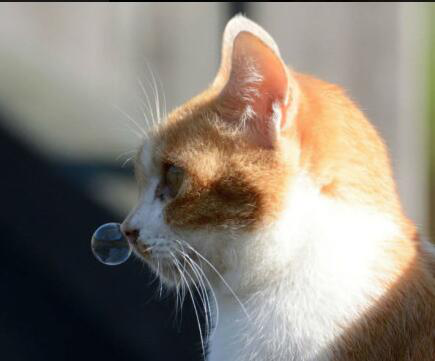

In [32]:
from PIL import Image
img = Image.open('./datacode_for_book/chapter2/cat.jpg')
img

In [37]:
img.mode
img.size
img.format

'RGB'

(435, 361)

'JPEG'

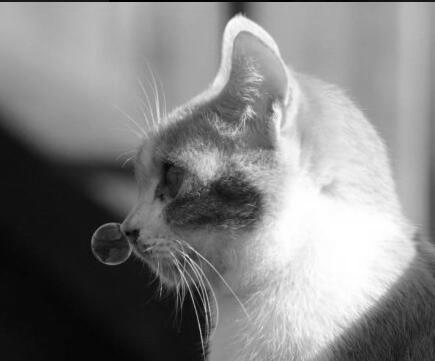

In [38]:
img_gray = img.convert('L')
img_gray

In [1]:
import cv2
img_cv2 = cv2.imread('./datacode_for_book/chapter2/cat.jpg')
# img_cv2
cv2.imshow('image',img_cv2)
# cv2.waitKey(0)

In [1]:
import cv2
cap = cv2.VideoCapture('./datacode_for_book/chapter2/tree.avi')
status = cap.isOpened()
if status:
    frame_width = cap.get(3) #获取帧宽度
    frame_height = cap.get(4) #获取帧高度
    frame_count = cap.get(7) #获取总帧数
    frame_fps = cap.get(5) #获取帧速率
    frame_width
    frame_height
    frame_count
    frame_fps
    
success,frame = cap.read()
while success:
    cv2.imshow('video frame',frame)
    success,frame = cap.read()
    k = cv2.waitKey(int(1000/frame_fps))
    if k == 27:
        break
        cv2.destroyAllWindows()
        cap.release()

320.0

240.0

444.0

14.999925000374999

In [21]:
import json
import base64
import requests
App_Id = mysetting.voice_app_id
API_Key = mysetting.voice_api_key
Secret_Key = mysetting.voice_secret_key
token_url = '''https://openapi.baidu.com/oauth/2.0/token?grant_type=client_credentials&client_id={}&client_secret={}'''.format(API_Key,Secret_Key)
res = requests.get(token_url)
res_text = res.text
token = json.loads(res_text)['access_token']
token

'24.7d05fb52e3a1591adce76173eb6d87fc.2592000.1545786619.282335-14938994'

In [14]:
voice_file = './datacode_for_book/chapter2/baidu_voice_test.pcm'
with open(voice_file,'rb') as fn:
    org_voice_data = fn.read()

In [22]:
from aip import AipSpeech
client = AipSpeech(App_Id, API_Key, Secret_Key)
client

In [24]:
client.asr(org_voice_data, 'pcm', 16000, {
    'dev_pid': 1536,
})

{'corpus_no': '6627971774205130148',
 'err_msg': 'success.',
 'err_no': 0,
 'result': ['名字介绍战神'],
 'sn': '507266912731543194934'}